In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/framingham.csv")

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [9, 12]], data.iloc[:, [15]], test_size=0.2, random_state=42)

In [ ]:
X_train.head()
##y_train.head()

,totChol,diaBP
3252,205.0,81.0
3946,250.0,92.5
1261,230.0,71.0
2536,228.0,82.5
4089,232.0,84.0


In [ ]:
X_train.isnull().sum().sort_values(ascending = False)

totChol    42
BMI        14
dtype: int64

In [ ]:
y_train.isnull().sum().sort_values(ascending = False)

TenYearCHD    0
dtype: int64

In [ ]:
X_train = X_train.fillna(0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.isnull().sum().sort_values(ascending = False)

totChol    0
diaBP      0
dtype: int64

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
print(sigmoid(2.4))

0.9168273035060777


In [ ]:
def compute_cost(X, y, w, b):
    m, n = X.shape

    ### START CODE HERE ###
    total_cost = 0
    for i in range(m):
        z = np.dot(w, X[i]) + b
        f_x = sigmoid(z)
        total_cost += -(y[i]*math.log(f_x))-((1-y[i])*math.log(1-f_x))

    total_cost = total_cost / m
    ### END CODE HERE ###

    return total_cost

In [ ]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ###
    for i in range(m):
        z = np.dot(w, X[i]) + b
        f_x = sigmoid(z)

        dj_db_i = f_x - y[i]
        dj_db += dj_db_i
        for j in range(n):
            dj_dw_i = (f_x - y[i]) * X[i,j]
            dj_dw[j] += dj_dw_i


    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ###


    return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, compute_cost, alpha):
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(100000):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  compute_cost(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(100000/10) == 0 or i == (100000 - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train

array([[0.29454023, 0.41795775],
       [0.3591954 , 0.56883803],
       [0.33045977, 0.475     ],
       ...,
       [0.42816092, 0.44172535],
       [0.30890805, 0.43133803],
       [0.35632184, 0.36338028]])

In [ ]:
len(X_train[0])

2

In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 100000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, 0.001)

KeyError: ignored

In [ ]:
print("w: {}, b: {}".format(w,b))

w: [0.52508091 0.43837154], b: [-6.475515]


In [ ]:
num_nan_values = np.count_nonzero(np.isnan(X_train))
print("\nTotal number of NaN values:", num_nan_values)


Total number of NaN values: 0


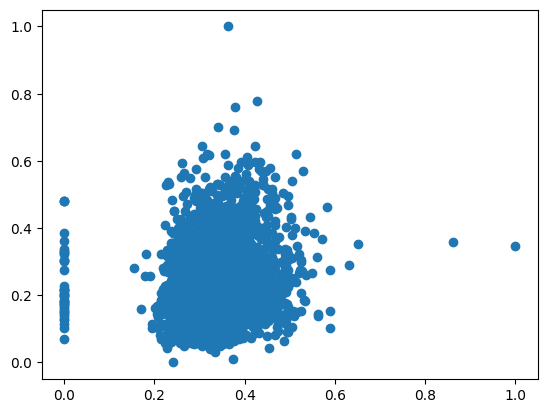

In [ ]:
fig, ax = matplotlib.pyplot.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1])

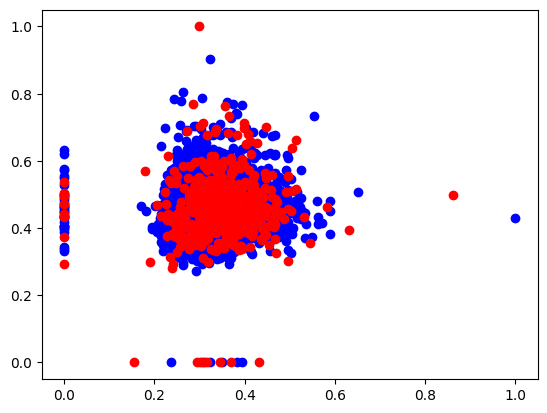

In [ ]:
x_zero = []
x_one = []

y_zero = []
y_one = []


for i in range(len(X_train)):
  for j in range(len(X_train[0])):
    if(j == 0):
      if y_train[i] == 0:
        x_zero.append(X_train[i,j])
      else:
        x_one.append(X_train[i,j])
    else:
      if y_train[i] == 1:
        y_one.append(X_train[i,j])
      else:
        y_zero.append(X_train[i,j])

matplotlib.pyplot.scatter(x_zero, y_zero, color = 'blue', label="no heart disease")
matplotlib.pyplot.scatter(x_one, y_one, color = 'red', label="heart disease")